In [230]:
#注册资本类型转换
data_final['reg_cap'] = data_final['reg_cap'].astype('float')

In [231]:
#服务年限类型转换
data_final['join_pay_serv_years'] = data_final['join_pay_serv_years'].astype('float')

In [232]:
#星级转换
data_final['iii_page_level_star'] = data_final['iii_page_level_star'].astype('float')

In [233]:
#最近365天是否自营退税
data_final = data_final.replace({'is_self_drbk_365':{'Y':1.0,'N':0.0}})

In [234]:
#金品诚企
data_final = data_final.replace({'is_as':{'Y':1.0,'N':0.0}})

In [235]:
#是否3N老客
data_final = data_final.replace({'if_fst_cust':{'Y':1.0,'N':0.0}})

In [236]:
#离散变量One-Hot编码
data_final = pd.get_dummies(data_final,columns=['iii_page_level_star','drbk_lvl'])

In [237]:
#剔除字符字段
data_final_d = data_final.drop(['target_flag','cust_id'],axis = 1)

In [238]:
#赋值
r_r_data = data_final_d

In [239]:
#训练集展示
print(r_r_data.columns)

Index(['build_years', 'is_as', 'reg_cap', 'join_pay_serv_years',
       'fb_cnt_3m_003', 'uv_1m_061', 'fst_reply_rate_1m_003',
       'adm_renew_amt_std_001', 'login_days_3m_002', 'release_itm_cnt_std_001',
       'is_self_drbk_365', 'fy19_tao_3n_gmv', 'rev_invoice_days',
       'tao_pay_amt', 'tad_pay_amt', 'if_fst_cust', 'fst_ord_file_cnt',
       'fst_ord_file_per', 'iii_page_level_star_0.0',
       'iii_page_level_star_1.0', 'iii_page_level_star_2.0',
       'iii_page_level_star_3.0', 'iii_page_level_star_4.0',
       'iii_page_level_star_5.0', 'drbk_lvl_1', 'drbk_lvl_2', 'drbk_lvl_3',
       'drbk_lvl_4'],
      dtype='object')


In [240]:
#训练集展示
r_r_data.head()

,build_years,is_as,reg_cap,join_pay_serv_years,fb_cnt_3m_003,uv_1m_061,fst_reply_rate_1m_003,adm_renew_amt_std_001,login_days_3m_002,release_itm_cnt_std_001,...,iii_page_level_star_0.0,iii_page_level_star_1.0,iii_page_level_star_2.0,iii_page_level_star_3.0,iii_page_level_star_4.0,iii_page_level_star_5.0,drbk_lvl_1,drbk_lvl_2,drbk_lvl_3,drbk_lvl_4
0,13.0,0.0,800.0,7.0,10.0,128,1.000,2000000.0,66.0,1430,...,1,0,0,0,0,0,0,1,0,0
1,8.0,0.0,200.0,11.0,104.0,817,0.967,13000000.0,79.0,1130,...,1,0,0,0,0,0,0,0,1,0
2,15.0,1.0,350.0,6.0,262.0,1777,0.871,36000000.0,87.0,4768,...,0,0,1,0,0,0,0,1,0,0
3,15.0,0.0,350.0,15.0,146.0,881,0.778,50000000.0,83.0,1534,...,0,0,0,1,0,0,0,1,0,0
4,12.0,0.0,1000.0,11.0,63.0,472,0.565,7000000.0,87.0,5201,...,1,0,0,0,0,0,0,1,0,0


In [242]:
#标准化
log_data = (r_r_data-r_r_data.mean())/r_r_data.std()
log_data.head()

,build_years,is_as,reg_cap,join_pay_serv_years,fb_cnt_3m_003,uv_1m_061,fst_reply_rate_1m_003,adm_renew_amt_std_001,login_days_3m_002,release_itm_cnt_std_001,...,iii_page_level_star_0.0,iii_page_level_star_1.0,iii_page_level_star_2.0,iii_page_level_star_3.0,iii_page_level_star_4.0,iii_page_level_star_5.0,drbk_lvl_1,drbk_lvl_2,drbk_lvl_3,drbk_lvl_4
0,0.509575,-0.575972,-0.014816,0.178882,-0.449163,-0.329054,0.934035,-0.592387,-0.478508,-0.381098,...,0.844101,-0.529083,-0.371634,-0.248488,-0.123899,-0.052223,-0.097618,1.712617,-1.609570,-0.122561
1,-0.451336,-0.575972,-0.057740,1.276314,-0.139998,-0.150268,0.820635,0.359088,0.203881,-0.441783,...,0.844101,-0.529083,-0.371634,-0.248488,-0.123899,-0.052223,-0.097618,-0.583855,0.621234,-0.122561
2,0.893940,1.736055,-0.047009,-0.095477,0.379662,0.098838,0.490744,2.348534,0.623813,0.294125,...,-1.184598,-0.529083,2.690607,-0.248488,-0.123899,-0.052223,-0.097618,1.712617,-1.609570,-0.122561
3,0.893940,-0.575972,-0.047009,2.373747,-0.001861,-0.133661,0.171162,3.559502,0.413847,-0.360060,...,-1.184598,-0.529083,-0.371634,4.024009,-0.123899,-0.052223,-0.097618,1.712617,-1.609570,-0.122561
4,0.317393,-0.575972,-0.000508,1.276314,-0.274847,-0.239791,-0.560783,-0.159898,0.623813,0.381713,...,0.844101,-0.529083,-0.371634,-0.248488,-0.123899,-0.052223,-0.097618,1.712617,-1.609570,-0.122561


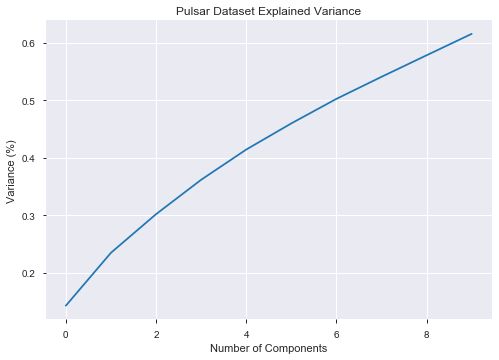

In [243]:
#PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca = pca.fit(log_data) 

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [244]:
#降维
reduced_data = log_data
#reduced_data = pca.transform(log_data)

In [245]:
#降维数据展示
reduced_data

,build_years,is_as,reg_cap,join_pay_serv_years,fb_cnt_3m_003,uv_1m_061,fst_reply_rate_1m_003,adm_renew_amt_std_001,login_days_3m_002,release_itm_cnt_std_001,...,iii_page_level_star_0.0,iii_page_level_star_1.0,iii_page_level_star_2.0,iii_page_level_star_3.0,iii_page_level_star_4.0,iii_page_level_star_5.0,drbk_lvl_1,drbk_lvl_2,drbk_lvl_3,drbk_lvl_4
0,0.509575,-0.575972,-0.014816,0.178882,-0.449163,-0.329054,0.934035,-0.592387,-0.478508,-0.381098,...,0.844101,-0.529083,-0.371634,-0.248488,-0.123899,-0.052223,-0.097618,1.712617,-1.609570,-0.122561
1,-0.451336,-0.575972,-0.057740,1.276314,-0.139998,-0.150268,0.820635,0.359088,0.203881,-0.441783,...,0.844101,-0.529083,-0.371634,-0.248488,-0.123899,-0.052223,-0.097618,-0.583855,0.621234,-0.122561
2,0.893940,1.736055,-0.047009,-0.095477,0.379662,0.098838,0.490744,2.348534,0.623813,0.294125,...,-1.184598,-0.529083,2.690607,-0.248488,-0.123899,-0.052223,-0.097618,1.712617,-1.609570,-0.122561
3,0.893940,-0.575972,-0.047009,2.373747,-0.001861,-0.133661,0.171162,3.559502,0.413847,-0.360060,...,-1.184598,-0.529083,-0.371634,4.024009,-0.123899,-0.052223,-0.097618,1.712617,-1.609570,-0.122561
4,0.317393,-0.575972,-0.000508,1.276314,-0.274847,-0.239791,-0.560783,-0.159898,0.623813,0.381713,...,0.844101,-0.529083,-0.371634,-0.248488,-0.123899,-0.052223,-0.097618,1.712617,-1.609570,-0.122561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13402,-1.412248,-0.575972,-0.057740,-1.192909,-0.324182,-0.280270,0.360162,-0.765382,0.098898,-0.331134,...,-1.184598,1.889913,-0.371634,-0.248488,-0.123899,-0.052223,-0.097618,-0.583855,0.621234,-0.122561
13405,-1.604430,1.736055,-0.064894,-0.918551,0.241524,0.007239,-0.550474,-0.246396,0.466338,-0.512178,...,-1.184598,-0.529083,2.690607,-0.248488,-0.123899,-0.052223,-0.097618,-0.583855,0.621234,-0.122561
13408,-0.835701,-0.575972,-0.071690,-0.918551,0.823675,0.574734,0.318926,-0.765382,0.466338,0.413067,...,-1.184598,1.889913,-0.371634,-0.248488,-0.123899,-0.052223,-0.097618,-0.583855,0.621234,-0.122561
13419,-0.835701,1.736055,-0.000508,-1.467268,0.238235,0.289040,0.315489,-0.678884,0.728795,-0.586820,...,-1.184598,-0.529083,-0.371634,4.024009,-0.123899,-0.052223,-0.097618,-0.583855,0.621234,-0.122561


In [246]:
#训练集拆分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reduced_data,data_final['target_flag'].astype('int') , test_size=0.3, random_state=44)

In [247]:
y_train.head()

13009    1
1893     0
8456     1
5714     0
2921     1
Name: target_flag, dtype: int32

In [248]:
#xgboost训练集与验证集重组
X_train['target'] = y_train
X_test['target'] = y_test
train_data_set = [X_train, X_test]

In [249]:
#估计函数
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

#初始参数
param_init = {'learning_rate':0.1,
              'max_depth':5,
              'n_estimators':1000,
              'min_child_weight':1,
              'gamma':0,
              'subsample':0.8,
              'colsample_bytree':0.8,
              'objective':'binary:hinge',
              'scale_pos_weight':1,
              'seed':27
}

In [250]:
#函数初始化
def modelfit(alg, i,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    param_test = {'n_estimators':[1000]}
    if useTrainCV:
        xgb_param = param_init
        xgtrain = xgb.DMatrix(i[0].drop(['target'],axis = 1), label=i[0]['target'])
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    print(alg.get_params())
    gsearch_micro = GridSearchCV(estimator = alg,
                           param_grid = param_test,
                           scoring='f1',
                           n_jobs=-1,
                           iid=False,
                           cv=5)
    gsearch_macro = GridSearchCV(estimator = alg,
                           param_grid = param_test,
                           scoring='roc_auc',
                           n_jobs=-1,
                           iid=False,
                           cv=5)

    gsearch_micro.fit(i[0].drop(['target'],axis = 1), i[0]['target'],eval_metric='auc')
    gsearch_macro.fit(i[0].drop(['target'],axis = 1), i[0]['target'],eval_metric='auc')

    #Print model report:
    print("\nModel Report")
    print("F1 : %.4g" % gsearch_micro.best_score_)
    print("ROC_AUC : %.4g" % gsearch_macro.best_score_)
    
    #best_alg = alg.fit(train_data_set[0].drop(['target'],axis = 1), train_data_set[0]['target'],eval_metric='merror')
    best_alg = gsearch_micro.best_estimator_

    feat_imp = pd.Series(best_alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return best_alg

def gridsearch_xg(i, param_init_d, param_test_d):
    print(param_init_d)
    print(param_test_d)
    gsearch = GridSearchCV(estimator = XGBClassifier(**param_init_d),param_grid = param_test_d,scoring='f1',n_jobs=-1,iid=False,cv=5)
    gsearch.fit(i[0].drop(['target'],axis = 1), i[0]['target'],eval_metric='auc')
    print(gsearch.best_params_,gsearch.best_score_)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 13, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:hinge', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 27, 'silent': None, 'subsample': 0.8, 'verbosity': 1}

Model Report
F1 : 0.5619
ROC_AUC : 0.7039


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

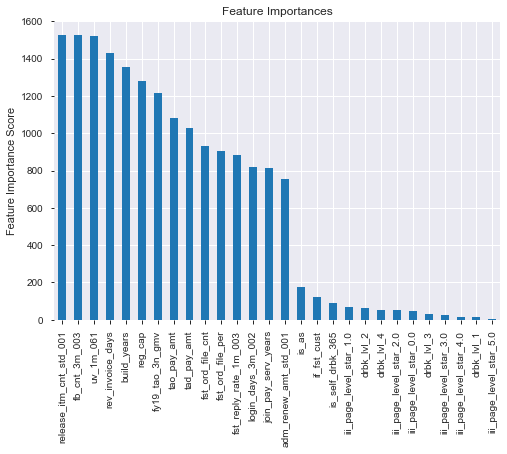

In [251]:
#参数测试
modelfit(XGBClassifier(**param_init), train_data_set)

In [252]:
#网格搜索max_depth和min_child_weight
param_test = {
 'max_depth':range(3,8,1),
 'min_child_weight':range(1,6,1)
}
gridsearch_xg(train_data_set, param_init, param_test)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'min_child_weight': 1, 'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'binary:hinge', 'scale_pos_weight': 1, 'seed': 27}
{'max_depth': range(3, 15), 'min_child_weight': range(1, 6)}
{'max_depth': 3, 'min_child_weight': 4} 0.6226279764852334


In [253]:
#更改参数
param_init['max_depth'] = 3
param_init['min_child_weight'] = 4

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 4, 'missing': None, 'n_estimators': 15, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:hinge', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 27, 'silent': None, 'subsample': 0.8, 'verbosity': 1}

Model Report
F1 : 0.6226
ROC_AUC : 0.7422


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

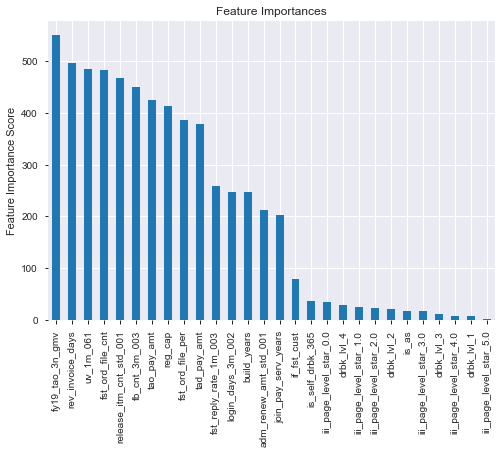

In [254]:
#参数测试
modelfit(XGBClassifier(**param_init), train_data_set)

In [113]:
#网格搜索微调min_chuld_weight
param_test = {
 'min_child_weight':range(1,12,1)
}
gridsearch_xg(train_data_set, param_init, param_test)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'min_child_weight': 1, 'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'multi:softmax', 'num_class': 9, 'scale_pos_weight': 1, 'seed': 27}
{'min_child_weight': range(1, 12)}
{'min_child_weight': 1} 0.45160755812515985


In [114]:
#更改参数
param_init['min_child_weight'] = 1

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 70, 'n_jobs': 1, 'nthread': None, 'objective': 'multi:softmax', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 27, 'silent': None, 'subsample': 0.8, 'verbosity': 1, 'num_class': 9}

Model Report
Train Micro F1 : 0.7976
Train Macro F1 : 0.4516


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, num_class=9, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=None, subsample=0.8, verbosity=1)

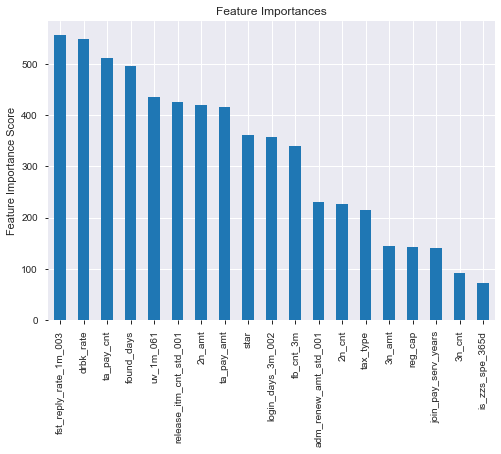

In [115]:
#参数测试
modelfit(XGBClassifier(**param_init), train_data_set)

In [255]:
#网格搜索调试gamma
param_test = {
 'gamma':[i/10.0 for i in range(0,10,2)]
}
gridsearch_xg(train_data_set, param_init, param_test)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'min_child_weight': 4, 'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'binary:hinge', 'scale_pos_weight': 1, 'seed': 27}
{'gamma': [0.0, 0.2, 0.4, 0.6, 0.8]}
{'gamma': 0.8} 0.6254998678306227


In [256]:
#更改参数
param_init['gamma'] = 0.8

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0.8, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 4, 'missing': None, 'n_estimators': 15, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:hinge', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 27, 'silent': None, 'subsample': 0.8, 'verbosity': 1}

Model Report
F1 : 0.6255
ROC_AUC : 0.7442


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.8,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

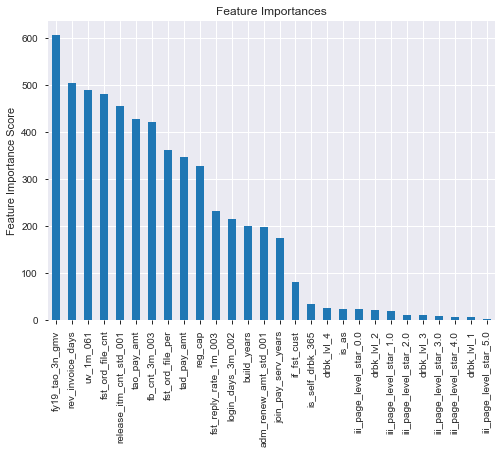

In [257]:
#参数测试
modelfit(XGBClassifier(**param_init), train_data_set)

In [258]:
#网格搜索调试subsample和colsample_bytree参数
param_test = {
    'subsample':[i/100.0 for i in range(60,96,5)],
    'colsample_bytree':[i/100.0 for i in range(60,96,5)]
}
gridsearch_xg(train_data_set, param_init, param_test)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'min_child_weight': 4, 'gamma': 0.8, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'binary:hinge', 'scale_pos_weight': 1, 'seed': 27}
{'subsample': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95], 'colsample_bytree': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]}


KeyboardInterrupt: 

In [259]:
#更改参数
param_init['colsample_bytree'] = 0.8
param_init['subsample'] = 0.8

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0.8, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 4, 'missing': None, 'n_estimators': 15, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:hinge', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 27, 'silent': None, 'subsample': 0.8, 'verbosity': 1}

Model Report
F1 : 0.6255
ROC_AUC : 0.7442


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.8,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

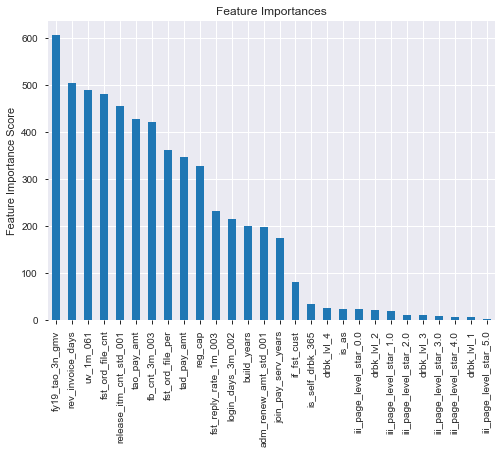

In [260]:
#参数测试
modelfit(XGBClassifier(**param_init), train_data_set)

In [122]:
#网格搜索调试正则化参数reg_alpha
param_test = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gridsearch_xg(train_data_set, param_init, param_test)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'min_child_weight': 1, 'gamma': 0.1, 'subsample': 0.85, 'colsample_bytree': 0.95, 'objective': 'multi:softmax', 'num_class': 9, 'scale_pos_weight': 1, 'seed': 27}
{'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]}
{'reg_alpha': 1e-05} 0.5495596491818601


In [123]:
#更改参数
param_init['reg_alpha'] = 1e-05

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.95, 'gamma': 0.1, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 52, 'n_jobs': 1, 'nthread': None, 'objective': 'multi:softmax', 'random_state': 0, 'reg_alpha': 1e-05, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 27, 'silent': None, 'subsample': 0.85, 'verbosity': 1, 'num_class': 9}

Model Report
Train Micro F1 : 0.8247
Train Macro F1 : 0.5496


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.95, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, num_class=9, objective='multi:softprob',
              random_state=0, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=None, subsample=0.85, verbosity=1)

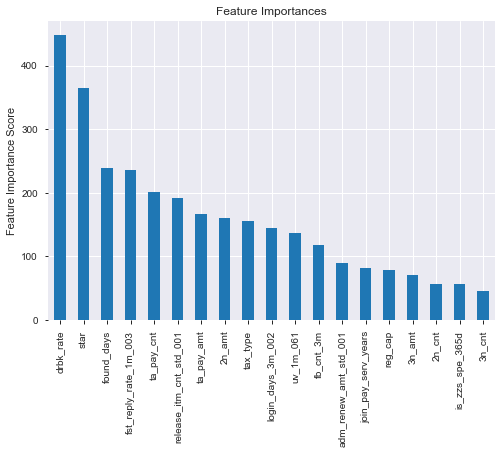

In [124]:
#参数测试
modelfit(XGBClassifier(**param_init), train_data_set)

In [125]:
#网格搜索调试正则化参数reg_lambda
param_test = {
    'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
}
gridsearch_xg(train_data_set, param_init, param_test)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'min_child_weight': 1, 'gamma': 0.1, 'subsample': 0.85, 'colsample_bytree': 0.95, 'objective': 'multi:softmax', 'num_class': 9, 'scale_pos_weight': 1, 'seed': 27, 'reg_alpha': 1e-05}
{'reg_lambda': [1e-05, 0.01, 0.1, 1, 100]}
{'reg_lambda': 1} 0.5495596491818601


In [126]:
#更改参数
param_init['reg_lambda'] = 1

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0.8, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 4, 'missing': None, 'n_estimators': 15, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:hinge', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 27, 'silent': None, 'subsample': 0.8, 'verbosity': 1}

Model Report
F1 : 0.6255
ROC_AUC : 0.7442


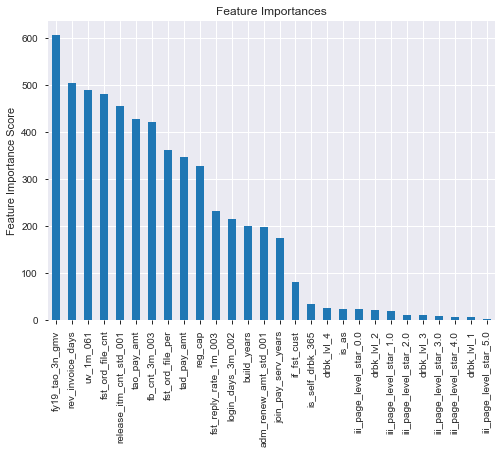

In [261]:
#最终模型
best_alg = modelfit(XGBClassifier(**param_init), train_data_set)

In [262]:
#模型验证
model_pred = best_alg.predict(train_data_set[1].drop(['target'],axis = 1))
print(f1_score(train_data_set[1]['target'], model_pred, average='binary'))
#print(f1_score(train_data_set[1]['target'], model_pred, average='macro'))

0.6369565217391304


In [371]:
#预测结果
result_pred_d = best_alg.predict(r_s_data_d)

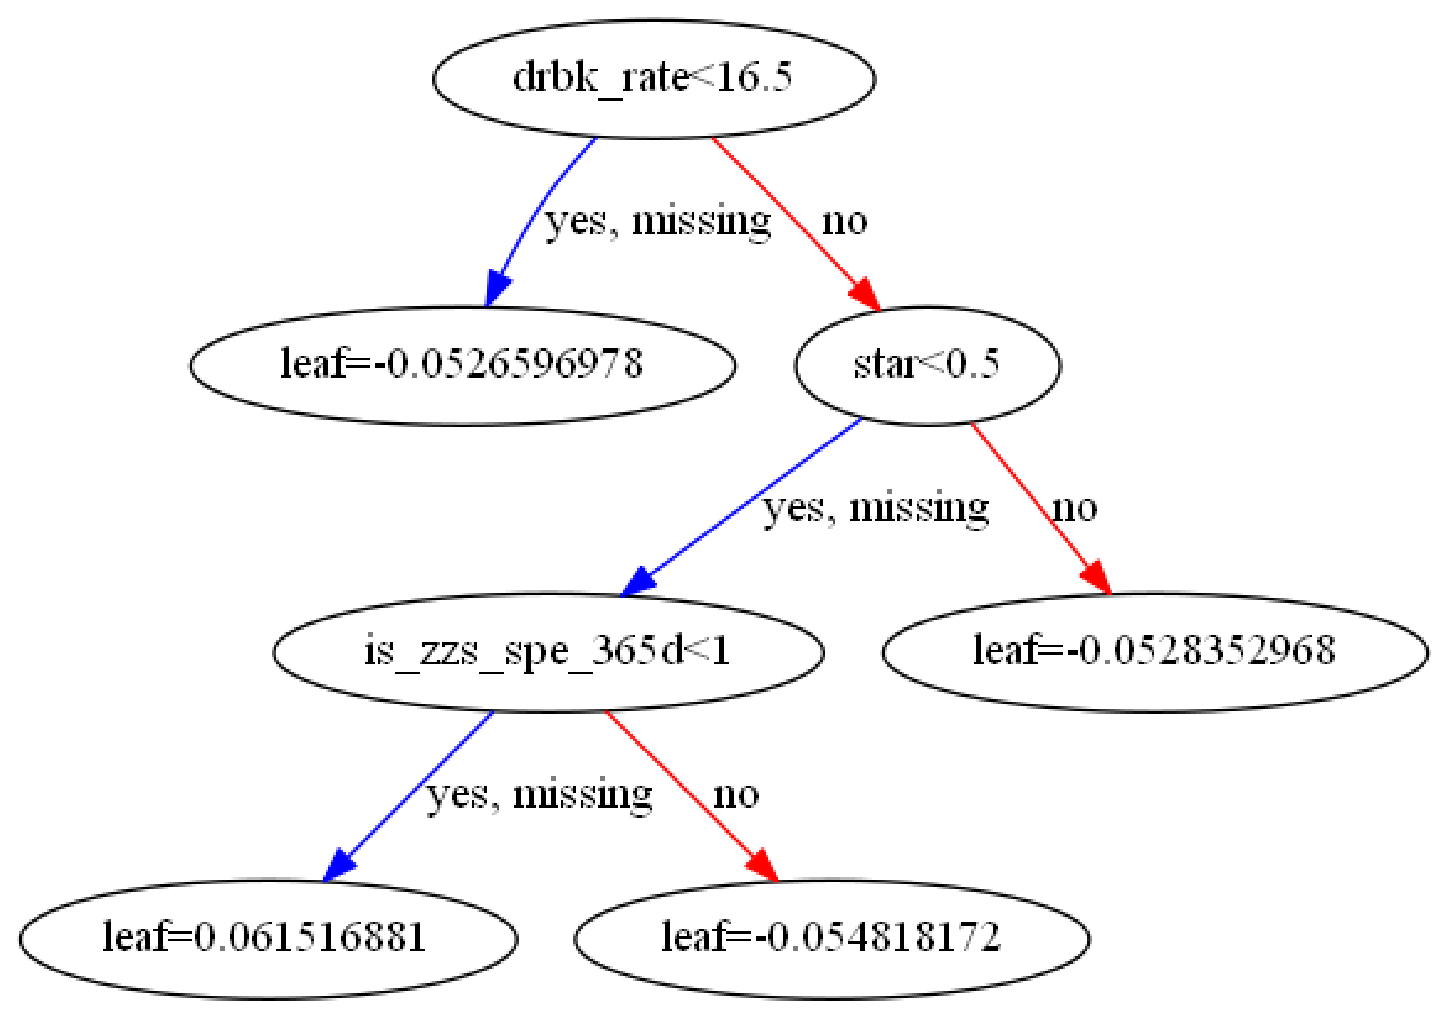

In [237]:
from xgboost import plot_tree
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'
#plot_tree(best_alg,num_trees=127, rankdir='LR')
plot_tree(best_alg,num_trees=127)
fig = plt.gcf()
fig.set_size_inches(28.5, 18.5)
plt.show()

In [259]:
#save model
import joblib
joblib.dump(best_alg, 'saved_model/best_clf.pkl')

['saved_model/best_clf.pkl']

In [45]:
#load model
import joblib
best_alg = joblib.load('saved_model/best_clf.pkl')